In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
X[0:10]

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258]])

In [4]:
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
y[:10]

array([ 0.0515729 ,  0.59447979,  0.16605161, -0.07017796,  0.34398593,
        0.37287494,  0.65976498,  0.3763414 , -0.00975194,  0.10479474])

In [15]:
df = pd.DataFrame()

In [16]:
df["X"] = X.reshape(100)
df["Y"] = y
df.head()

,X,Y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs Y')

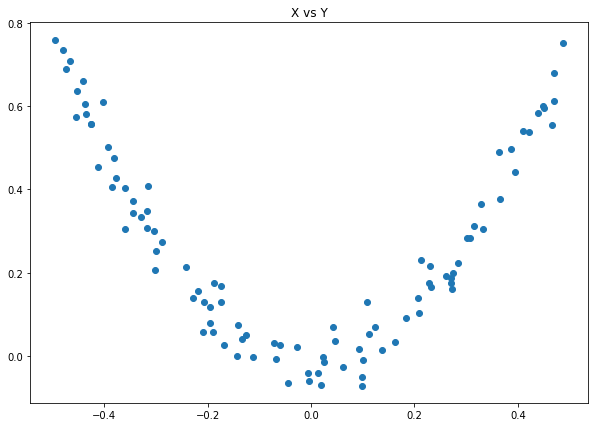

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(df['X'],df['Y'])
plt.title('X vs Y')

In [20]:
#first model prediction should be mean always
df["pred1"] = df["Y"].mean()
df.head()

,X,Y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [21]:
#Taking residulas and making decision tree according to it
df["res1"] = df["Y"] - df["pred1"]

In [22]:
df.sample(5)

,X,Y,pred1,res1
29,-0.453550,0.637324,0.265458,0.371866
18,-0.068055,-0.005711,0.265458,-0.271169
40,-0.377962,0.426830,0.265458,0.161371
91,0.213245,0.231260,0.265458,-0.034199
6,-0.441916,0.659765,0.265458,0.394307


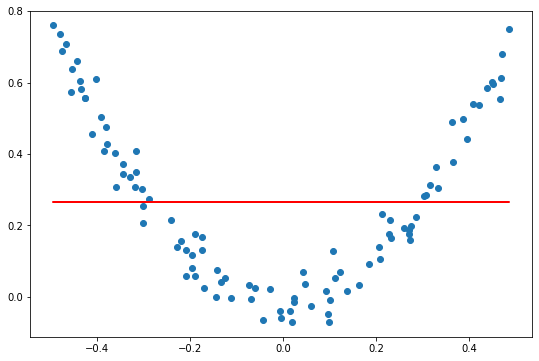

In [24]:
#Plotting Scatter plot wrt pred1 values
plt.figure(figsize = (9,6))
plt.scatter(df.X, df.Y)
plt.plot(df.X, df.pred1, c='red')

In [26]:
#Using Decision Tree to Predict Residuals
from sklearn.tree import DecisionTreeRegressor

In [32]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df.X.values.reshape(100,1), df.res1)

DecisionTreeRegressor(max_leaf_nodes=8)

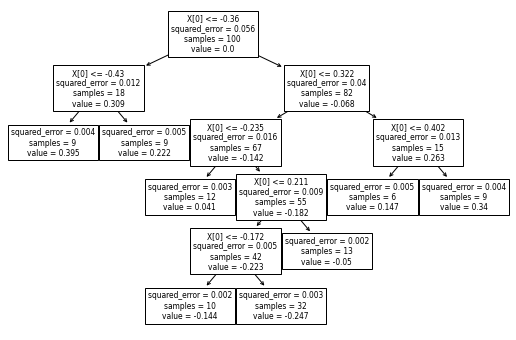

In [33]:
#Ploting Tree
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [35]:
# Predicting with one tree
X_test = np.linspace(-0.5, 0.5, 500)
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

In [40]:
def fig_plot(X_test,y_pred, df):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.plot(X_test, y_pred, linewidth=2,color='red')
    plt.scatter(df['X'],df['Y'])

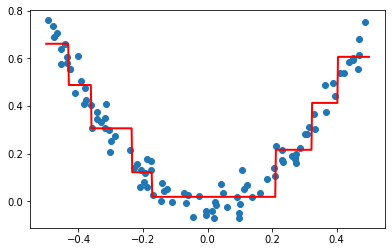

In [41]:
fig_plot(X_test,y_pred, df)

In [42]:
#prediction 2
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [43]:
df.sample(5)

,X,Y,pred1,res1,pred2
23,-0.133638,0.041848,0.265458,-0.223610,0.018319
92,0.260785,0.191757,0.265458,-0.073701,0.215784
61,-0.228651,0.140741,0.265458,-0.124718,0.121593
49,-0.315146,0.407473,0.265458,0.142015,0.305964
16,-0.195758,0.079861,0.265458,-0.185598,0.121593


In [45]:
df['res2'] = df['Y'] - df['pred2']
df.head()

,X,Y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


In [46]:
#decision tree 2
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [47]:
#predicting values using two decision tree
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

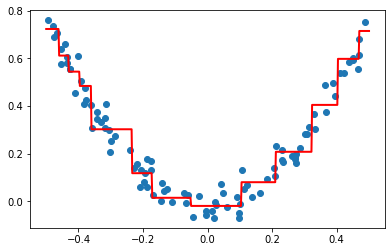

In [48]:
fig_plot(X_test,y_pred, df)

In [49]:
#Making Gradient decient
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

    if number == 0:
        return 
    else:
    # do gradient boosting
        if count > 1:
          y = y - regs[-1].predict(X)
        else:
          foo = y

        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X, y)

        regs.append(tree_reg)

        x1 = np.linspace(-0.5, 0.5, 500)
        y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

        print(number)
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2)
        plt.plot(X[:, 0], foo,"r.")
        plt.show()

        gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


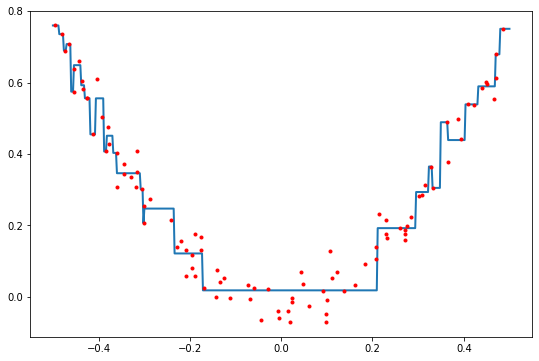

4


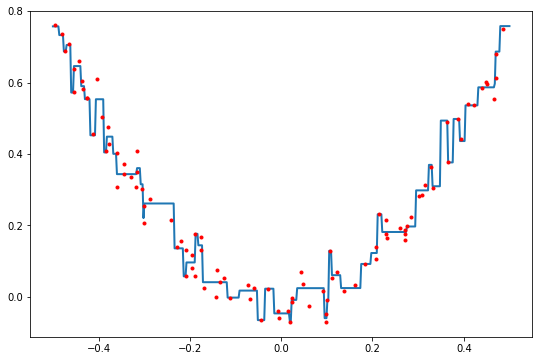

3


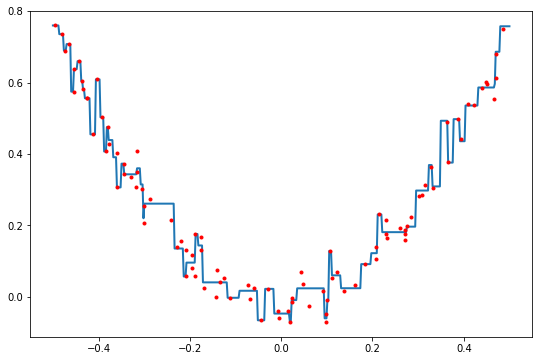

2


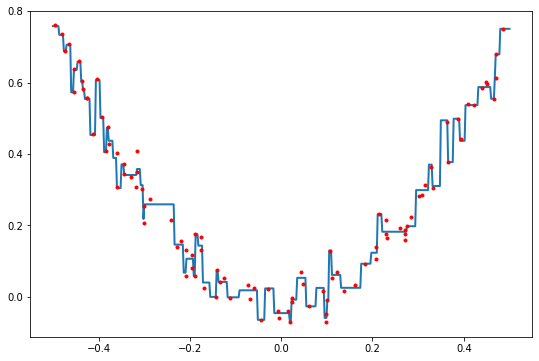

1


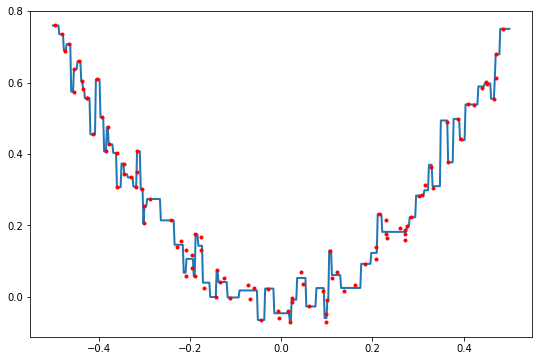

In [50]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)